# 4D-STEM Tutorial

This tutorial is designed as a quick walk-through to the functions avaible through pyXEM.  It will not cover everything and if you want to further explore pyxem a better place to satart is with the pyxem-demos which will offer more indepth instrucution on using pyxem. 

This demo is designed to work with minimum pyxem version 13.3.  If you don't have at least version 13.3 installed it is a good idea to update your version of pyxem so that things work as intended. 

-- csfrancis@wisc.edu --

Sunday July 31, 2022


## Contents 

0. <a href='#in'> Introduction</a>
1. <a href='#pr'> Loading pyXEM</a>
2. <a href='#vdf'> Virtual Dark Feild Imaging</a>
3. <a href='#vf'> Peak Finding and Machiene Learning</a>
4. <a href='#ml'> Orentation Mapping</a>
5. <a href='#vec'> Amorphous Materials</a>

<a href='#in'></a>

## Introduction:

### What is pyXem?

- Pyxem is part of the `Hyperspy` ecosystem specifically designed for analyzing diffraction from pixelated detectors.

### What about 4-D STEM?

- Yep! 4-D STEM, 5-D STEM and on.  Pyxem is purposely built to handle any size data that you have. 

### What is avabile in pyXEM?

- Orientation Mapping of Crystals
- Strain Mapping
- Virtual Dark Field Imaging
- Differential Phase Contrast (DPC)
- Structural Characterization of Amorphous Materials (Angular Correlations/FEM)
- And much more!

###  Is pyXEM  still in Development?

- PyXEM is still in a beta format which means that with every minor relase there will still be API changes.  We try to keep these to a minimum but they will still occur.

- A major relase is upcoming which should stablize pyXEM's API in the near future. 

### Is pyXEM part of Hyperspy?

- Yes! and No... 
- pyXEM **extends** the capabilities of Hyperspy.  With the new Hyperspy-bundle pyXEM is automatically included which means you won't have to deal with downloading pyXEM seperately!

<br/>
<br/>
<img style='margin:auto;' src='img/HyperspyExtension.png'/>
<br/>

In [2]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import diffpy

<a id='pr'></a>

## Printing Known Signal Types

Pyxem **extends** hyperspy.  This means that for most operations you won't have to load pyxem once pyxem is downloaded.  With the [``hyperspy bundle``](http://hyperspy.org/hyperspy-doc/current/user_guide/install.html#hyperspy-bundle) this is very easy as you can use anaconda to easily download and install the necessary packages. 

A good first step in any operation is to print the known signal types. This is very helpful to:

**1- Check that packages like pyxem/kikuchipy/atomap etc. are loaded**

**2- Use as a reference when changing signal types**

In [3]:
# Printing the known signal types
hs.print_known_signal_types()

signal_type,aliases,class name,package
beam_shift,,BeamShift,pyxem
CL_SEM,"CLSEM, cathodoluminescence SEM",CLSEMSpectrum,lumispy
CL_STEM,"CLSTEM, cathodoluminescence STEM",CLSTEMSpectrum,lumispy
CL,"CLSpectrum, cathodoluminescence",CLSpectrum,lumispy
correlation,,Correlation1D,pyxem
correlation,,Correlation2D,pyxem
dpc,,DPCBaseSignal,pyxem
dpc,,DPCSignal1D,pyxem
dpc,,DPCSignal2D,pyxem
DielectricFunction,dielectric function,DielectricFunction,hyperspy


<a href='#lo'></a>
## 1. Loading & Visualization

Loading data into pyxem is just as easy as loading data into hyperspy. We can call the load function from hyperspy and load the data. 

See how the data is loaded as a Diffraction2D Signal already, this is because hyperspy remembers the Signal type if you save the data. 

In [4]:
# Loading data 
dp = hs.load('./data/twinned_nanowire.hspy')
print(dp)

<Diffraction2D, title: , dimensions: (30, 24|144, 144)>


### 1.1 Changing Signal Type
You can also change the Signal type after the fact.  In this case we want to work with electron diffraction data so we use the `set_signal_type` function to change the signal using the alais shown above from the `print_known_signals` function.

In [5]:
dp.set_signal_type('electron_diffraction')
print(dp)
display(dp.metadata)

<ElectronDiffraction2D, title: , dimensions: (30, 24|144, 144)>


├── Acquisition_instrument
│   └── TEM
│       ├── beam_energy = 300.0
│       ├── camera_length = 0.21000000000000002
│       └── scan_rotation = 277.0
├── General
│   ├── FileIO
│   │   ├── 0
│   │   │   ├── hyperspy_version = 1.7.1
│   │   │   ├── io_plugin = hyperspy.io_plugins.hspy
│   │   │   ├── operation = load
│   │   │   └── timestamp = 2022-07-23T09:53:23.799806-06:00
│   │   ├── 1
│   │   │   ├── hyperspy_version = 1.7.1
│   │   │   ├── io_plugin = hyperspy.io_plugins.hspy
│   │   │   ├── operation = save
│   │   │   └── timestamp = 2022-07-23T09:53:44.689184-06:00
│   │   └── 2
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.hspy
│   │       ├── operation = load
│   │       └── timestamp = 2022-07-25T12:41:07.916563-06:00
│   ├── original_filename = nanowire_precession.blo
│   ├── time = (2014, 12, 8)
│   └── title = 
└── Signal
    ├── signal_origin = 
    └── signal_type = electron_diffraction

### 1.2 Adjusting the Axes Scale & Metadata

In many cases data will not be loaded with appropiate units/ experimental parameters or scale.  Hyperspy is usually pretty good at reading this from the file but often times that data will have to be added after. We can fix this by manually setting this for our dataset.

In [6]:
dp.beam_energy = 300
dp.metadata.Acquisition_instrument.TEM.camera_length =21 
dp.metadata.Acquisition_instrument.TEM.scan_rotation = 277
dp.metadata.Acquisition_instrument.TEM.convergence_angle =0.7
dp.metadata.Acquisition_instrument.TEM.exposure_time =10.0
dp.metadata.General.title = 'GaAs Nanowire'

In [7]:
# Show the metadata that we are interested in
dp.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── beam_energy = 300
│       ├── camera_length = 21
│       ├── convergence_angle = 0.7
│       ├── exposure_time = 10.0
│       └── scan_rotation = 277
├── General
│   ├── FileIO
│   │   ├── 0
│   │   │   ├── hyperspy_version = 1.7.1
│   │   │   ├── io_plugin = hyperspy.io_plugins.hspy
│   │   │   ├── operation = load
│   │   │   └── timestamp = 2022-07-23T09:53:23.799806-06:00
│   │   ├── 1
│   │   │   ├── hyperspy_version = 1.7.1
│   │   │   ├── io_plugin = hyperspy.io_plugins.hspy
│   │   │   ├── operation = save
│   │   │   └── timestamp = 2022-07-23T09:53:44.689184-06:00
│   │   └── 2
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.hspy
│   │       ├── operation = load
│   │       └── timestamp = 2022-07-25T12:41:07.916563-06:00
│   ├── original_filename = nanowire_precession.blo
│   ├── time = (2014, 12, 8)
│   └── title = GaAs Nanowire
└── Signal
    ├── signal_origin = 
    └── signal_type = electron_diffraction

### 1.3 Applying an Affine Transformation and Centering the Direct Beam 

In most data some of your first steps are going to be applying an affine correction (to correct for astigmatism if present) and then centering the direct beam. (This can also help to correct for any scan pivot point misalignments which are often difficult to correct for.)

If you want to determine the proper affine correction using a standard is very helpful.  Refer to the `pyXEM` [User Guide](https://github.com/pyxem/pyxem-demos) for help. 

**Note:** This won't work if you have a beam stop blocking the zerobeam.


In [8]:
#look at the center direct beam function
dp.center_direct_beam?

In [9]:
transform = np.array([[0.99,0,0], [0,0.69,0],[0,0,1]])

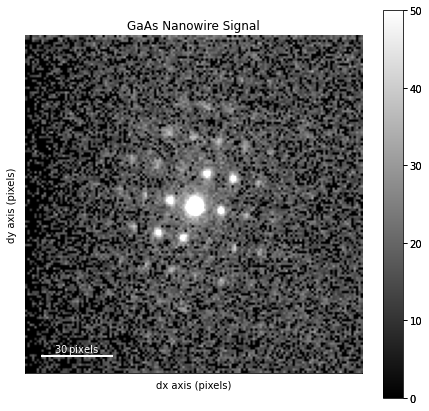

In [10]:
# plot one pattern from original data
dp.inav[10,10].plot(vmax=50)

In [11]:
#apply an affine transformation
dp.apply_affine_transformation(transform,
                               keep_dtype=True,
                               inplace=True)

# Centering the Direct Beam
dp.center_direct_beam(method='cross_correlate',
                                             radius_start=2,
                                             radius_finish=5,
                                             half_square_width=10,
                                 )
#reset the offset for the axes
dp.axes_manager[2].offset = dp.axes_manager[2].size/2
dp.axes_manager[3].offset = dp.axes_manager[3].size/2

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  0.5s


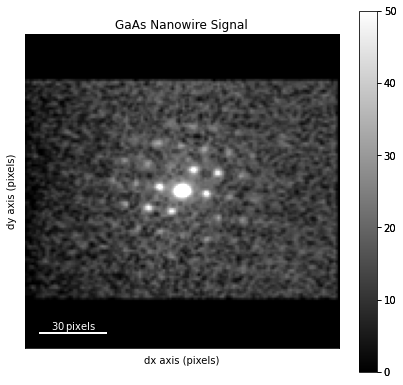

In [12]:
# plot onr pattern from transformed data
dp.inav[10,10].plot(vmax=50)
plt.show()

### 1.3 Adjusting the Axes Scale & Metadata

In many cases data will not be loaded with appropiate units/ experimental parameters or scale.  Hyperspy is usually pretty good at reading this from the file but often times that data will have to be added after. We can fix this by manually setting this for our dataset.

In this case we want to look at the inter planer spacing to determine the scale bar.

#### Side Note:

If you want to do this interactively you need to make sure you are using a backend for matplotlib which is interactive.  For the most part ``%matplotlib notebook`` should work.

Interact with the plot as necessary and then if you compute the cell below it will update with line profile of the area of interest. 

In [13]:
%matplotlib notebook
dpm = dp.mean(axis=(0,1))

<IPython.core.display.Javascript object>


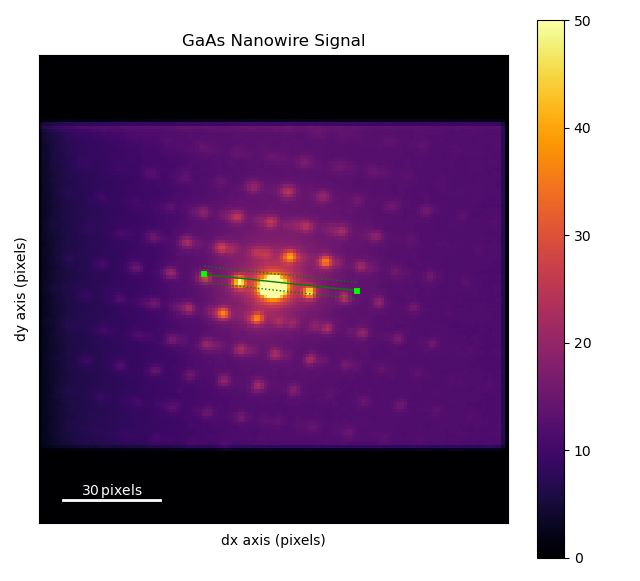

In [14]:
# Creating a Line ROI to get spacing 
dpm.plot(cmap='inferno', vmax=50)
line = hs.roi.Line2DROI(x1=122., y1=139., x2=169., y2=144, linewidth=5.49734)
line.add_widget(dpm)

<IPython.core.display.Javascript object>


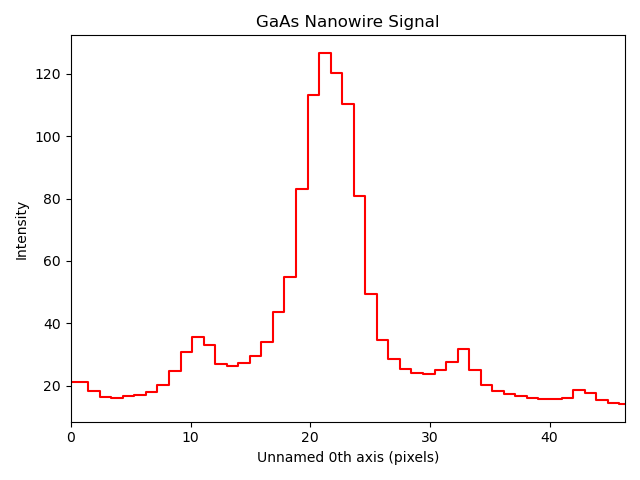

In [15]:
trace = line(dpm)
trace = trace.as_signal1D(spectral_axis=0)
trace.plot()

In [16]:
#find the peaks in the trace.
peaks = trace.find_peaks1D_ohaver()
peaks

[########################################] | 100% Completed |  0.1s


array([array([( 3.8376741 , 3.33322512,         nan),
              (11.48433626, 4.44310283, 17.30827275),
              (21.43594413, 7.92025885, 10.69839051),
              (31.12885471, 4.18692007, 20.22969586),
              (40.99515426, 3.40855724, 32.31287698)],
             dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])],
      dtype=object)

<IPython.core.display.Javascript object>


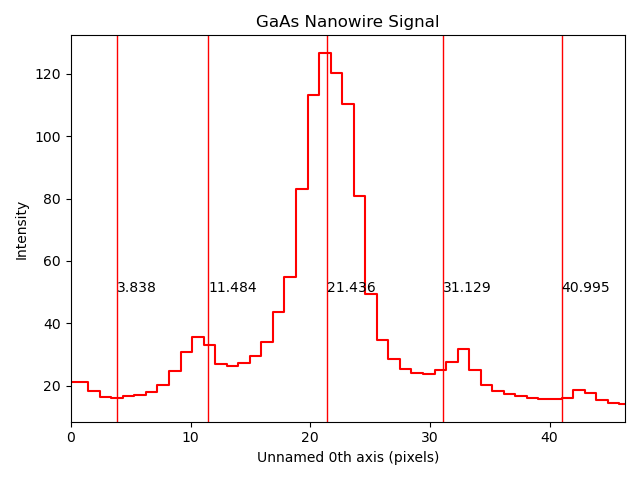

In [17]:
trace.plot(plot_markers=True)

In [18]:
markers = [hs.plot.markers.vertical_line(x=peak[0], color='red') for peak in peaks[0]]
tmarkers = [hs.plot.markers.text(x=peak[0], y=50,text=np.round(peak[0],3), color='black') for peak in peaks[0]]
trace.add_marker(markers, permanent=True)
trace.add_marker(tmarkers, permanent=True)

In [19]:
pixel_d111 = (67.242-24.542)/4
GaAs_dspacing =5.75018263
recip_d111 = np.sqrt((3/GaAs_dspacing**2))
recip_cal = recip_d111 / pixel_d111
dp.set_scan_calibration(10)
dp.set_diffraction_calibration(recip_cal)
dp.unit = "k_A^-1"

In [20]:
#visualize the axes manager to make sure that the function works...
dp.axes_manager

Navigation axis name,size,index,offset,scale,units
x,30,0,0.0,10.0,nm
y,24,0,250.0,10.0,nm
Signal axis name,size,,offset,scale,units
kx,144,,-2.0316252493824365,0.02821701735253384,k_A^-1
ky,144,,-2.0316252493824365,0.02821701735253384,k_A^-1


<a href='#vdf'></a>

## 2. Virtual Dark Field (VDF) Imaging
Now it is pretty easy to create a Virtual Diffraction Image using hyperspy's ROI tools.  In this case we just use the `plot_integrated_intensity` function to view our roi.

<IPython.core.display.Javascript object>


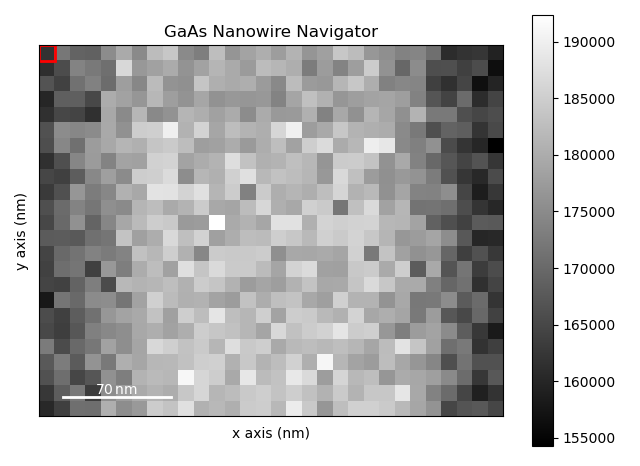

<IPython.core.display.Javascript object>


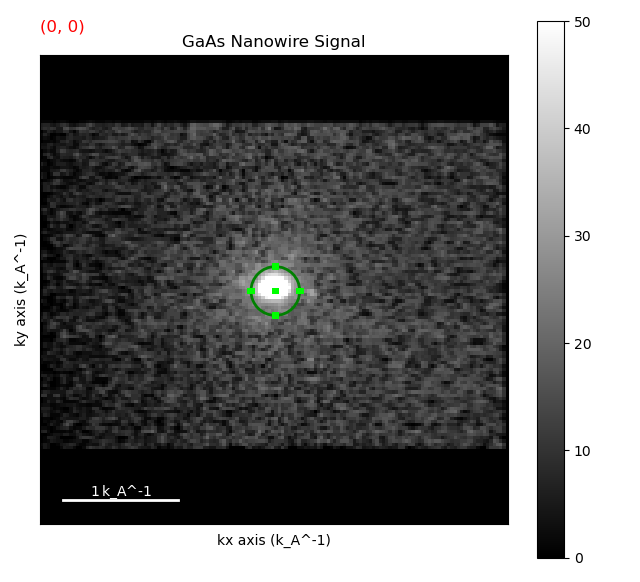

<IPython.core.display.Javascript object>


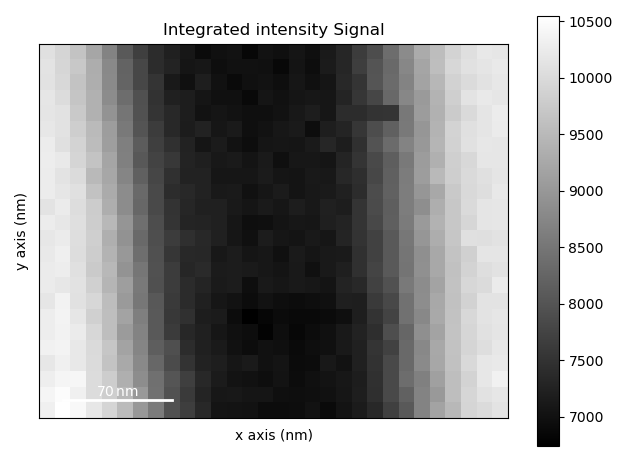

In [21]:
#Creating an Interactive VDF Imange
dp.plot(vmax=50)
roi = hs.roi.CircleROI(cx=0,cy=0, r_inner=0, r=0.2)
dp.plot_integrated_intensity(roi)

<IPython.core.display.Javascript object>


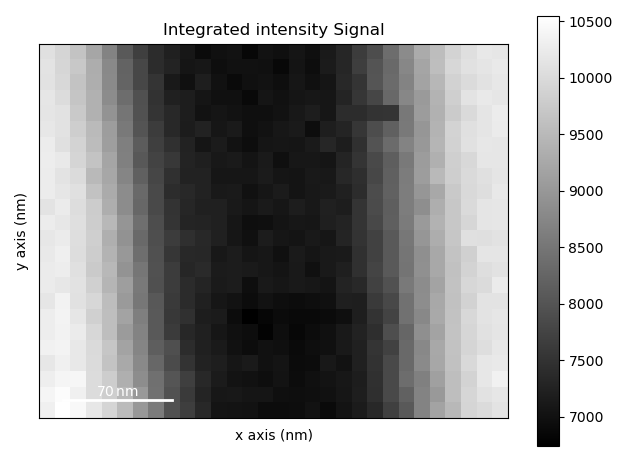

<Signal2D, title: Integrated intensity, dimensions: (|30, 24)>


In [22]:
vdf = dp.get_integrated_intensity(roi)
vdf.plot()
print(vdf)

### 2.1 Forming Multiple Images from Concentric Rings!

From pyxem we can also load the virtual Image generator to form images from different annular ranges. (In many different ways!)

### Using the Azimuthal Integrator 

One of my favorite ways to look at data is in polar coordinates.  This allows us to better see things like k-spacing and crystal orientations.

Pyxem uses [PyFAI](https://pyfai.readthedocs.io/en/master/) to handle all of the backend azimuthal integration.  This means that pyxem can handle:

- Unique detector configerations
- GPU acclerated integration
- Many different algorithms implemented by PyFAI. 

In [23]:
# Setting the Azimuthal Integrator to help unwrap the function
dp.set_ai()

[########################################] | 100% Completed |  2.6s


<IPython.core.display.Javascript object>


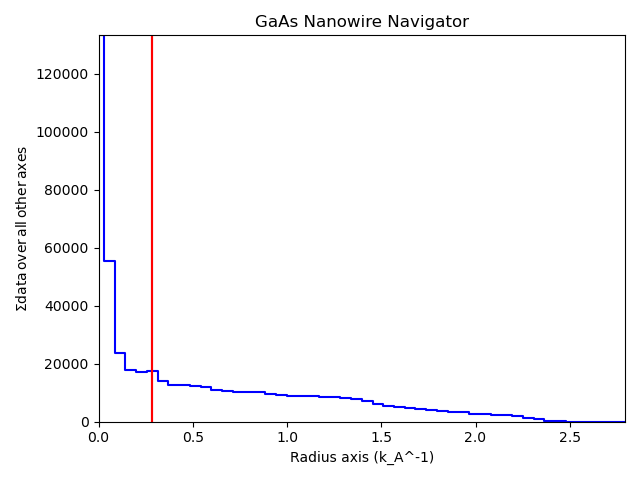

<IPython.core.display.Javascript object>


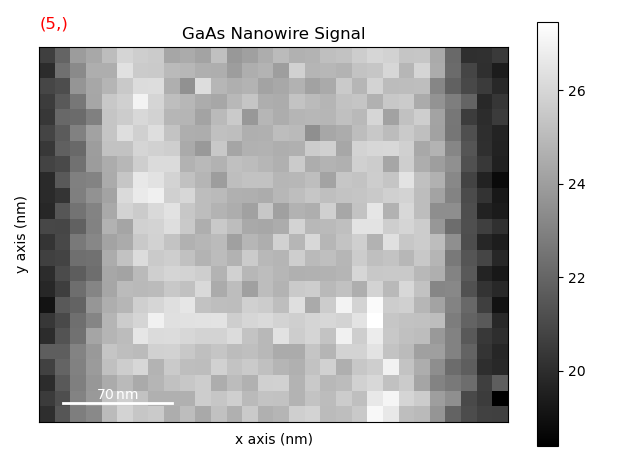

In [24]:
# get the Azimuthal Integral1d
dp.get_azimuthal_integral1d(npt=50).T.plot()

[########################################] | 100% Completed |  3.8s


<IPython.core.display.Javascript object>


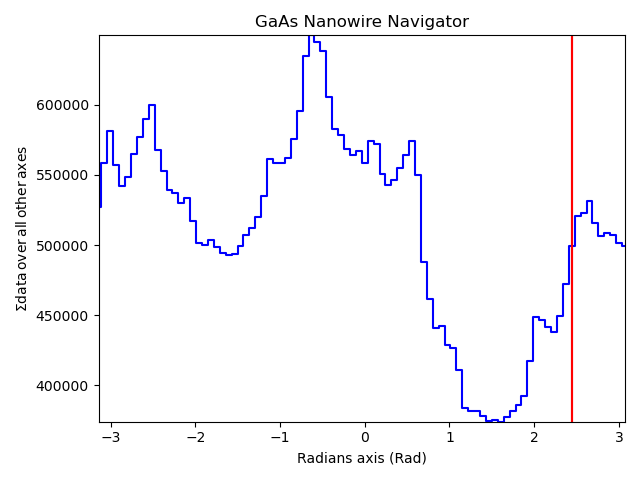

<IPython.core.display.Javascript object>


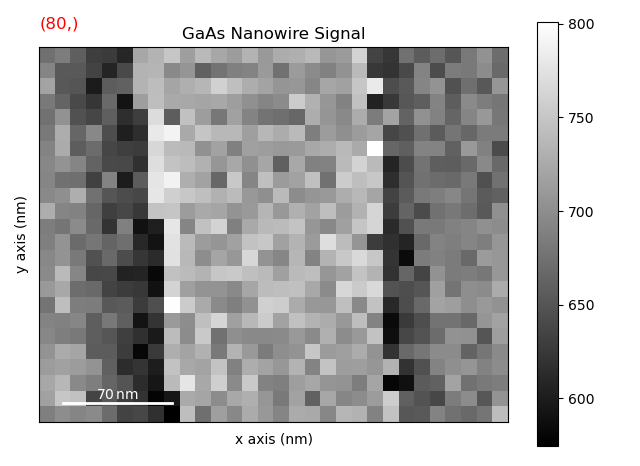

In [25]:
#get the 2D integral and then sum along the k direction
dp.get_azimuthal_integral2d(npt=50, npt_azim=90).sum(axis=3).T.plot()

## 3.0 Using Machine Learning:

We are going to use Non-negitivie Matrix factorization (NMF) to help segement our image. 

This is particularly useful becuase unlike SVD or PCA it applies the constraint that every value needs to be positive (which is particualarly important in our case where we can assume that each component is positive. 

More information on what ```hyperspy``` is calling :

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF

In [26]:
# preform NMF decomposition (try output_dimension =4)
# Try other dimensions if you are interested. How does it change?
# This might not work on Binder as it changes the d
dp.data = dp.data.astype('float32')
dp.decomposition(algorithm="NMF",output_dimension=4)

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=NMF
  output_dimension=4
  centre=None
scikit-learn estimator:
NMF(n_components=4)


<IPython.core.display.Javascript object>


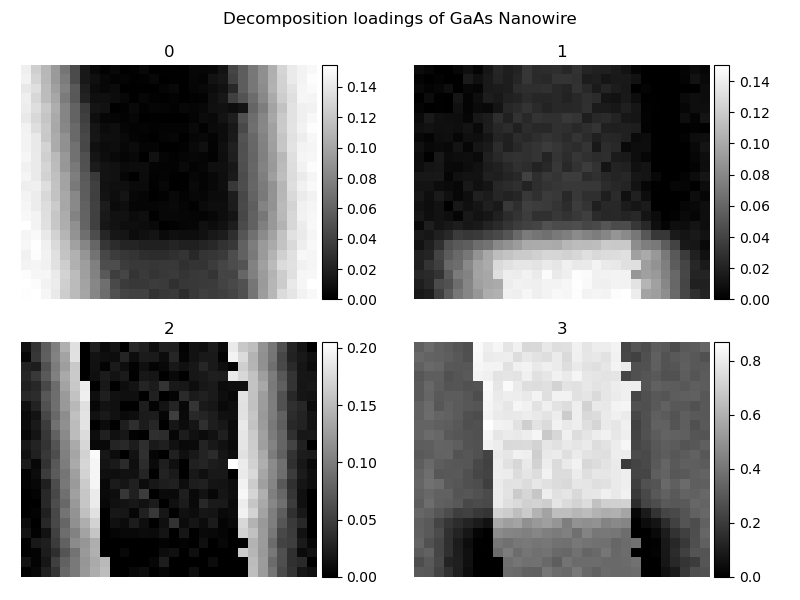

<IPython.core.display.Javascript object>


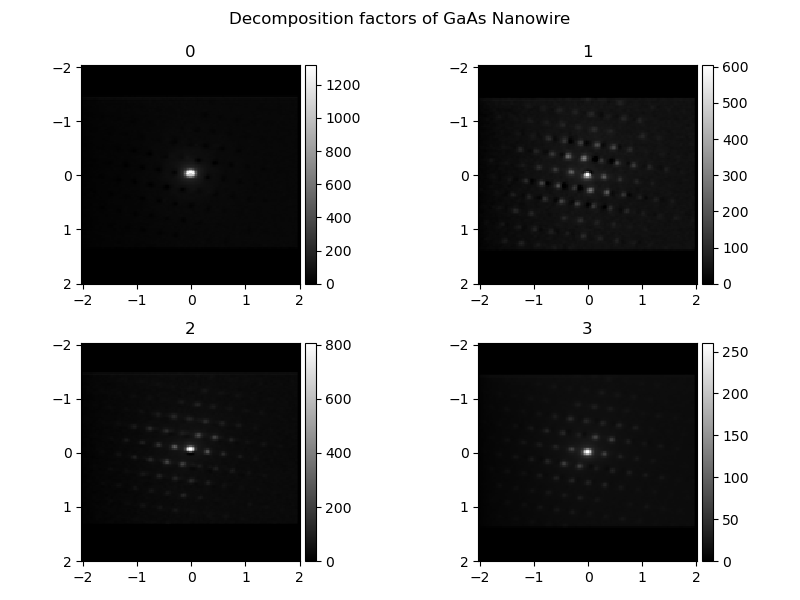

In [27]:
#plot decomposition loadinds and factors.  What does each loading and factor represent?
dp.plot_decomposition_loadings(per_row=2, axes_decor='off')
dp.plot_decomposition_factors(per_row=2, axes_decor='off')
plt.show()

## 4.0 Peak Finding:

Pyxem also implements the hyperspy peak-finding algorithm which can be tuned to help identify diffraction spots.  

This helps define diffraction vectors which can be used for a variety of different things

In the example below we use the Difference of Gaussians (DOG) method from skimage to find the diffraction spots. 

https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html?highlight=dog


In [28]:
#try adjusting the threshold here to find more or less peaks. 
# (Hint anything lower the 0.02 will fail take a long time to find all of the peaks)
peaks = dp.find_peaks(method='difference_of_gaussian',
                      min_sigma=1.,
                      max_sigma=6.,
                      sigma_ratio=1.6,
                      threshold=0.1,
                      overlap=0.99,
                      interactive=False)

[########################################] | 100% Completed |  4.0s


In [29]:
from pyxem.signals.diffraction_vectors import DiffractionVectors

In [30]:
peaks = DiffractionVectors.from_peaks(peaks,center=(72,72),calibration=recip_cal)

[########################################] | 100% Completed |  0.1s


/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/hyperspy/axes.py:2124: VisibleDeprecationWarning: Using `set_signal_dimension` is deprecated, use `as_signal1D`, `as_signal2D` or `transpose` of the signal instance instead.
  warnings.warn(("Using `set_signal_dimension` is deprecated, use "


<IPython.core.display.Javascript object>


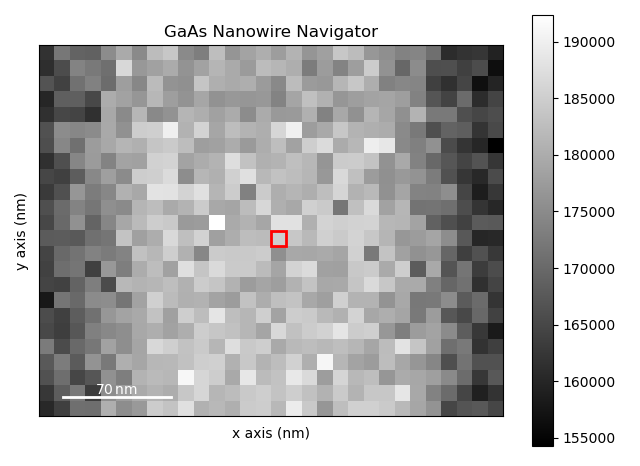

<IPython.core.display.Javascript object>


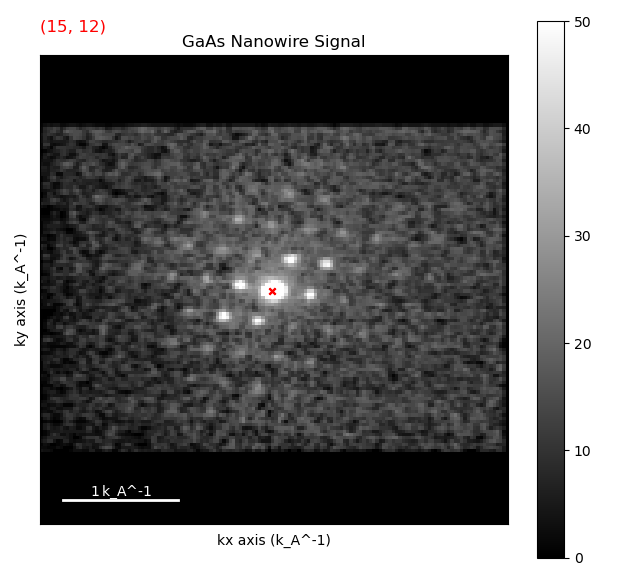

In [31]:
peaks.plot_diffraction_vectors_on_signal(dp, vmax=50)

[########################################] | 100% Completed |  0.1s


<IPython.core.display.Javascript object>


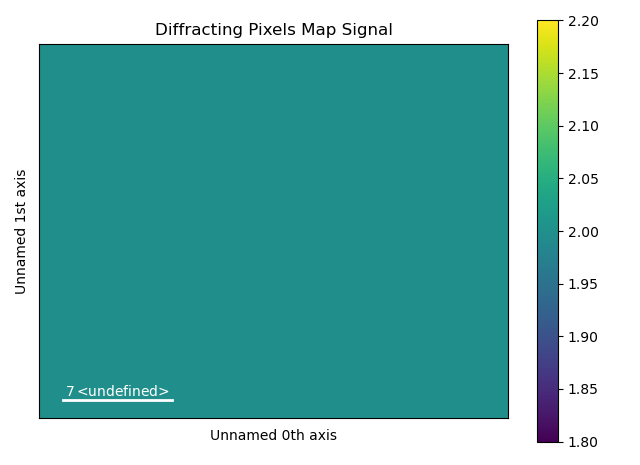

In [32]:
# get the number of diffraction vectors at each point (x,y)
crystim = peaks.get_diffracting_pixels_map(binary=False)
crystim.plot(cmap='viridis')

<a id='tem'></a>
##  6.0 Angular Correlations and FEM

###  6.1 Data Loading and Visualization

Below we are going to load a dataset for a PdNiP glass and look at the dominate symmetries in the glass.

To do this we cacluate the angular correlation defined below. 

<p style="text-align: center;">
$ C(k,\phi) = \frac{<I(k, \theta)*I(k, \theta+\phi)>_\theta - <I(k,\theta)>^2_\theta }{<I(k, \theta)>^2_\theta} $
</p>

This gives us the symmetry of some diffraction pattern regaurdless of orientation. 

In [28]:
dp = hs.load("./data/PdNiP_test.hspy")

In [29]:
dp.set_signal_type("electron_diffraction")
dp.beam_energy=200
dp.unit = "k_nm^-1"
# Affine correction from fitting an ellipse
import numpy as np
center=(31.2,31.7)
affine=np.array([[ 1.03725511, -0.02662789,  0.        ],
                 [-0.02662789,  1.01903215,  0.        ],
                 [ 0.        ,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


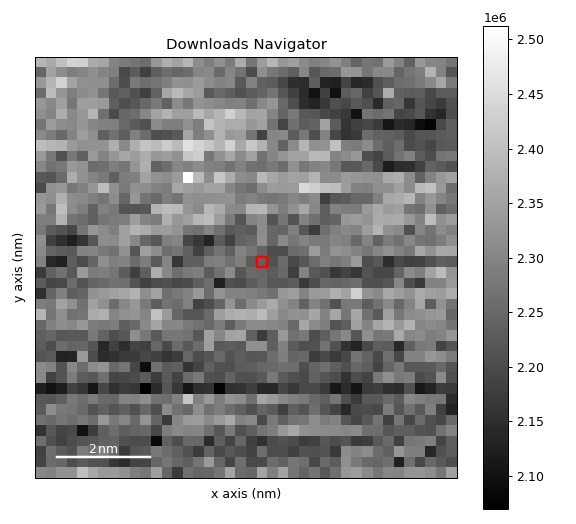

<IPython.core.display.Javascript object>


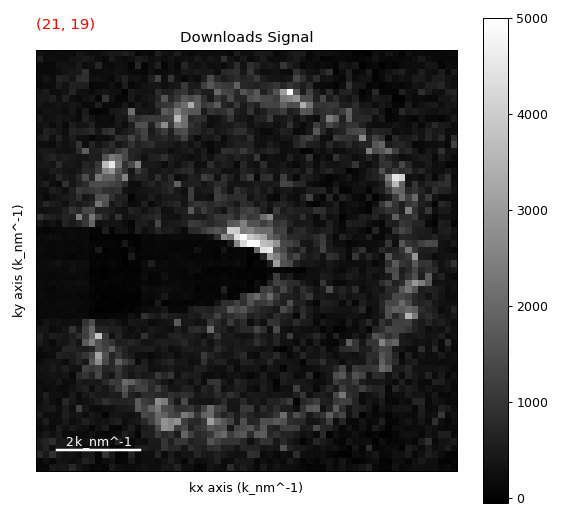

In [30]:
dp.plot(vmax=5000)

In [31]:
#set ai 
dp.set_ai(center=center)
dp.get_azimuthal_integral2d(npt=100, inplace=True)

[########################################] | 100% Completed |  3.9s


<IPython.core.display.Javascript object>


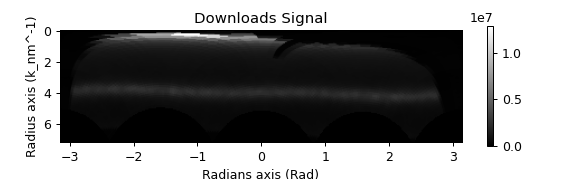

In [32]:
dp.sum().plot()

In [33]:
#create a mask
summed = dp.sum()
mask = ((summed.data>4e6) +(summed.data<3e5))

<IPython.core.display.Javascript object>


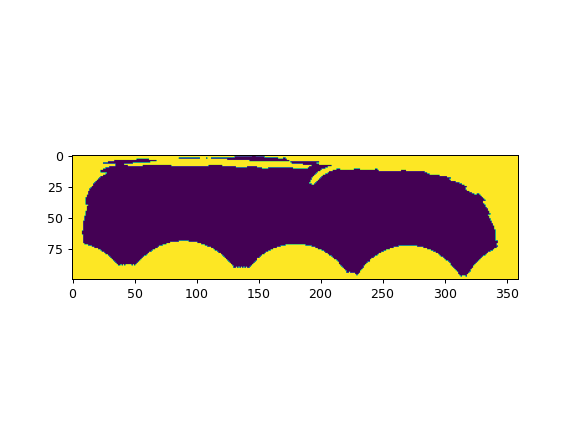

In [34]:
plt.figure()
plt.imshow(mask)
plt.show()

<IPython.core.display.Javascript object>


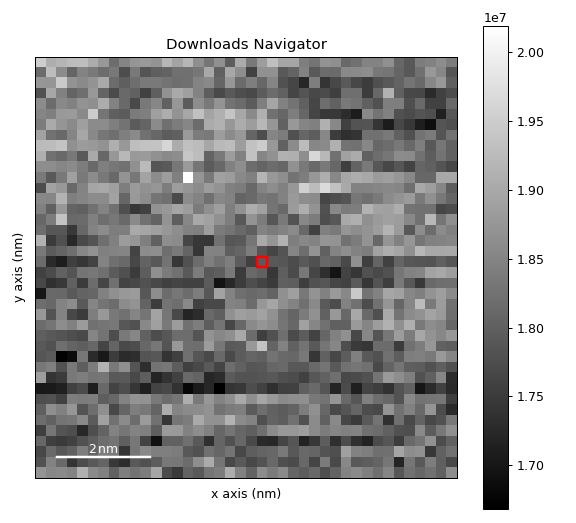

<IPython.core.display.Javascript object>


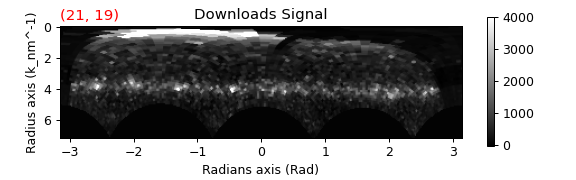

In [35]:
dp.plot(vmax=4000)

In [36]:
#get the angular correlation
dp.get_angular_correlation(mask=mask, inplace=True)

[########################################] | 100% Completed |  0.9s


<IPython.core.display.Javascript object>


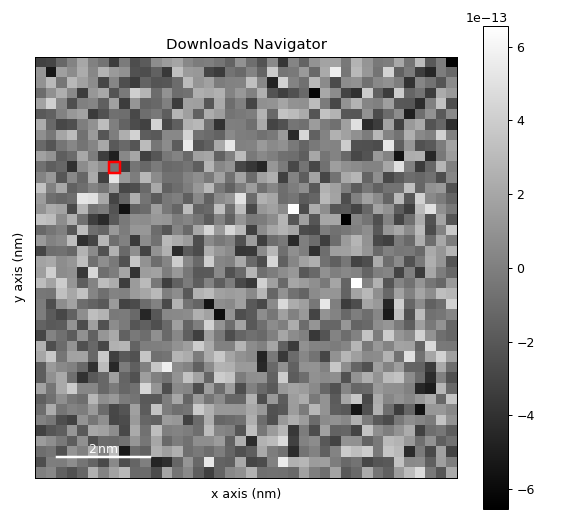

<IPython.core.display.Javascript object>


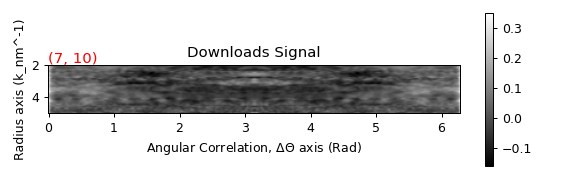

In [37]:
dp.isig[:,2.:5.].plot()

<IPython.core.display.Javascript object>


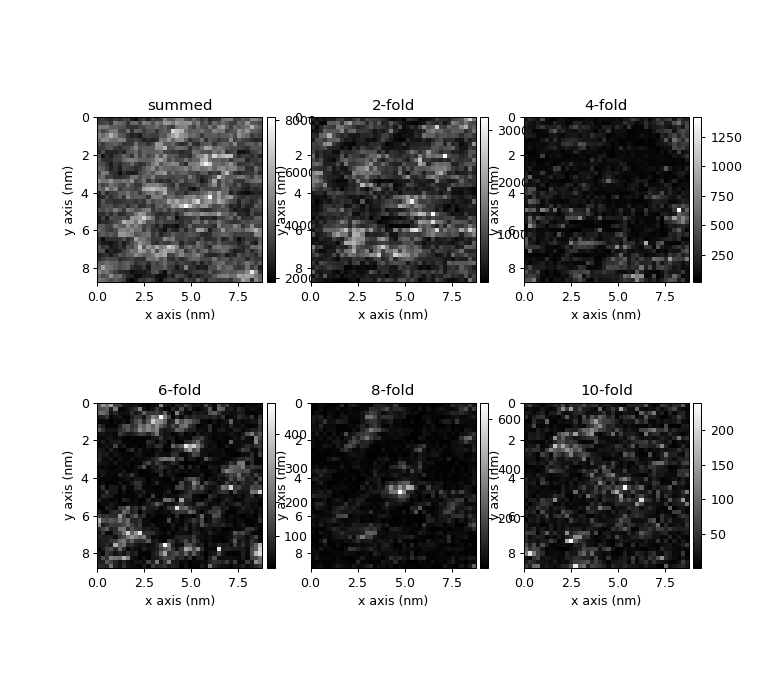

In [40]:
#plot the angular symmetries. 
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,10))
dp.plot_symmetries(k_region = [3.,4.5],fig=f)